In [148]:
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os

PATH_IMG = "../IMAGENS/"

PATH = os.getcwd()

print(os.getcwd())
print(os.listdir(PATH_IMG))
print(cv.__version__)

img_original = cv.imread(PATH_IMG + os.listdir(PATH_IMG)[1])
img_gray = cv.cvtColor(img_original, cv.COLOR_BGR2GRAY)

/home/andre/Documents/Git/VISAO_ROBOTICA_EGM0008/05_FILTRAGEM_DE_IMAGENS
['circulo.png', 'Lenna.png', 'carrinho.jpg', 'Einstein.png', 'everest.jpg', 'fabio.png']
4.10.0


# Funções Usadas na atividade

In [149]:
#=======================================================================
def cm_to_inch(value):
    return value/2.54
#=======================================================================
def filtro_espacial(img, kernel):
    img_temp = np.zeros_like(img, dtype=np.float16)

    lk = kernel.shape[0]
    ck = kernel.shape[1]

    llin = int(lk/2)
    lcol = int(ck/2)

    res = 0
    for i in range(llin, img.shape[0] - llin):
        for j in range(lcol, img.shape[1] - lcol):
            janela = img[(i-llin):(i+llin+1), (j-lcol):(j+lcol+1)]
            res = janela * kernel

            img_temp[i,j] = np.sum(res)

    return img_temp
#=======================================================================
def gaussian_kernel(size, k, sigma):
    kernel = np.zeros((size,size))
    
    llin = int(size/2) #supoe impar
    lcol = llin #e quadrado
    
    for m in range(-llin, llin+1):
        for n in range(-lcol, lcol+1):
            kernel[m+llin, n+lcol] = k*np.exp(-(m**2+n**2) / (2*sigma**2))
    
    kernel = 1 / np.sum(kernel) * kernel 
    
    return kernel

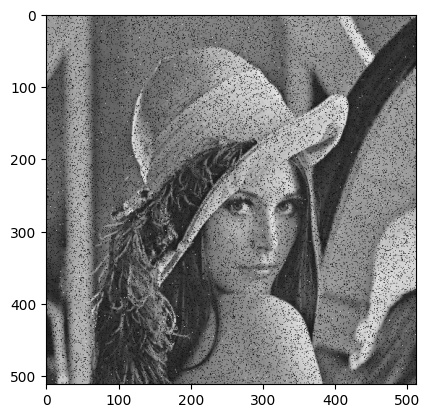

In [150]:
noise = np.uint8(0.15*np.random.normal(128, 63.5, size=(img_gray.shape[0],img_gray.shape[1])))
mask = np.random.rand(*img_gray.shape) < 0.1

img_noise = np.copy(img_gray)
img_noise[mask] = noise[mask]

plt.imshow(img_noise, cmap="gray")

plt.show()

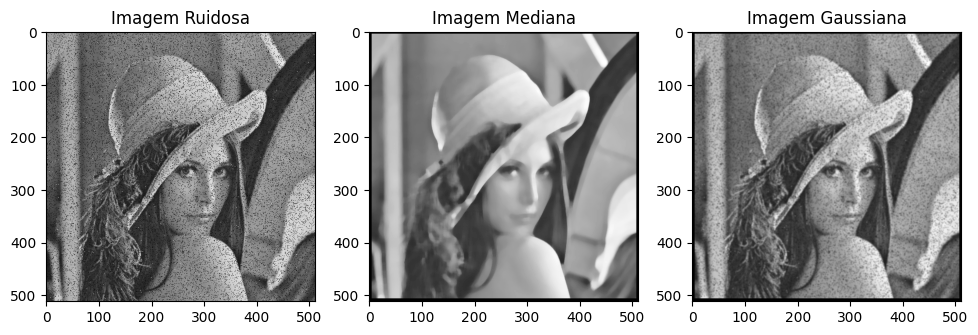

In [152]:
# Trecho que realiza a filtragem da mediana
size_kernel = 11

llin = int(size_kernel/2)
lcol = int(size_kernel/2)

img_mediana = np.zeros_like(img_gray)

for i in range(llin, img_gray.shape[0] - llin):
    for j in range(lcol, img_gray.shape[1] - lcol):
        janela = img_gray[(i-llin):(i+llin+1), (j-lcol):(j+lcol+1)]

        img_mediana[i,j] = np.median(janela)
# Trecho que realiza a filtragem da mediana

img_gaussian = np.zeros_like(img_gray)

# Verifica se o tamnho do kernel é impar
if size_kernel % 2 == 0:
    size_kernel += 1
    img_gaussian = filtro_espacial(img_noise, gaussian_kernel(size_kernel, 1, 1))
else:
    img_gaussian = filtro_espacial(img_noise, gaussian_kernel(size_kernel, 1, 1))

plt.figure(figsize=(cm_to_inch(30), cm_to_inch(30)))
plt.subplot(131)
plt.title("Imagem Ruidosa")
plt.imshow(img_noise, cmap="gray")

plt.subplot(132)
plt.title("Imagem Mediana")
plt.imshow(img_mediana, cmap="gray")

plt.subplot(133)
plt.title("Imagem Gaussiana")
plt.imshow(img_gaussian, cmap="gray")

plt.show()

# Resultados

* __Mediana__: Houve a remoção do ruído porém a imagem ficou mais borrada,
com um _blur_ maior que a imagem filtrada pela gaussiana. Porém ao aumentar 
a janela do filtro, a imagem fica cade vez mais borrada.

* __Gaussiana__: Houve uma redução muito baixa em comparação a filtragem mediana,
mas não acrescentou muito o _blur_. Mesmo aumentando o tamanho do kernel, a ruído
ainda permaneçe, porém o _blur_ ainda é muito pequeno.

In [ ]:
#   Caso o pc da nasa n tenha tanta memoria

# del noise, mask, img_noise, filtro_mediana, img_mediana
# del img_gaussian, size_kernel